#### Zadanie
* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

#### Punkty:

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

<h3>Zad 5</h3>

Proszę przeprowadzić symulację epidemii jako model SIR (równanie Kermacka-McKendricka (1927)) opisany układem równań różniczkowych:

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$
gdzie $\beta >0$ oznacza współczynnik (tempo) rozprzestrzeniania się infekcji,
$\gamma >0$ jest współczynnikiem zdrowienia osobników zainfekowanych.

Warunki początkowe:

S- osobniki podatne $S(0)> 0$

I- osobniki chorujące i roznoszące infekcję $I(0)>0$

R- osobniki ozdrowiałe $R(0)=0$.

Rozszerzenie: zaimplementować model epidemii jako automat komórkowy 
 * https://en.wikipedia.org/wiki/Epidemic_models_on_lattices
 * https://mathworld.wolfram.com/CellularAutomaton.html
 * https://grimmel.github.io/posts/2020/10/blog-post-1/

In [1]:
using Plots
using Pkg
using Images
using Distributions


(process:26940): GLib-GIO-WARNING **: 14:39:06.019: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22041.10091.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


In [2]:
cols = [:navy, :maroon, :darkgreen, :cyan3, :chocolate, :seagreen4]
print()

In [3]:
function plotSIR(S, I, R, xs, cols, method)
    plot(xs, S, size=(500, 350), color=cols[1], width=1.3, label="S $method", xlabel="t", ylabel="y")
    plot!(xs, I, color=cols[2], width=1.3, label="I $method")
    plot!(xs, R, color=cols[3], width=1.3, label="R $method")
end

plotSIR (generic function with 1 method)

In [4]:
function Eulers(S0, I0, R0, beta, gamma, t, n)
    S = [S0]
    I = [I0]
    R = [R0]
    for i = 1:(n-1)
        push!(S, S[i] - beta*I[i]*S[i]*t)
        push!(I, I[i] + (beta*I[i]*S[i] - gamma*I[i])*t)
        push!(R, R[i] + gamma*I[i]*t)
    end
    return (S, I, R)
end

Eulers (generic function with 1 method)

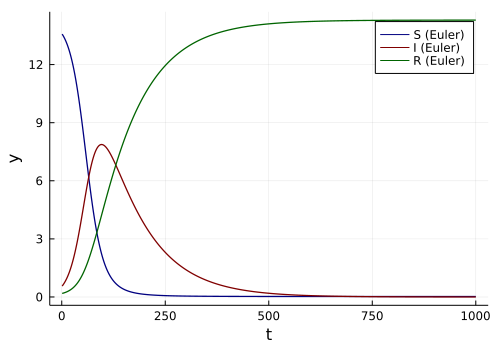

In [5]:
S0 = 13.57410
I0 = 0.56340
R0 = 0.18430
beta = 0.03156
gamma = 1/14
t = 0.1407
n = 1000
(S, I, R) = Eulers(S0, I0, R0, beta, gamma, t, n)
plotSIR(S, I, R, 1:n, cols, "(Euler)")

In [6]:
function RungeKutta4(S0, I0, R0, beta, gamma, h, n)
    S = [S0]
    I = [I0]
    R = [R0]
    for i = 1:(n-1)
        Sk1 = -beta*S[i]*I[i]
        Ik1 = beta*S[i]*I[i] - gamma*I[i]
        Rk1 = gamma*I[i]

        Sk2 = -beta*(S[i] + Sk1*h/2)*(I[i] + Ik1*h/2)
        Ik2 = beta*(S[i] + Sk1*h/2)*(I[i] + Ik1*h/2) - gamma*(I[i] + Ik1*h/2)
        Rk2 = gamma*(I[i] + Ik1*h/2)

        Sk3 = -beta*(S[i] + Sk2*h/2)*(I[i] + Ik2*h/2)
        Ik3 = beta*(S[i] + Sk2*h/2)*(I[i] + Ik2*h/2) - gamma*(I[i] + Ik2*h/2)
        Rk3 = gamma*(I[i] + Ik2*h/2)

        Sk4 = -beta*(S[i] + Sk3*h)*(I[i] + Ik3*h)
        Ik4 = beta*(S[i] + Sk3*h)*(I[i] + Ik3*h) - gamma*(I[i] + Ik3*h)
        Rk4 = gamma*(I[i] + Ik3*h)
        
        push!(S, S[i] + (1/6)*(Sk1+2*Sk2+2*Sk3+Sk4)*h)
        push!(I, I[i] + (1/6)*(Ik1+2*Ik2+2*Ik3+Ik4)*h)
        push!(R, R[i] + (1/6)*(Rk1+2*Rk2+2*Rk3+Rk4)*h)
    end
    return (S, I, R)
end

RungeKutta4 (generic function with 1 method)

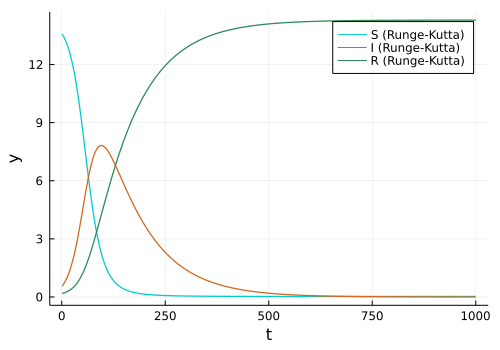

In [7]:
(S, I, R) = RungeKutta4(S0, I0, R0, beta, gamma, t, n)
plotSIR(S, I, R, 1:n, cols[4:6], "(Runge-Kutta)")

In [8]:
function cmp_methods(S0, I0, R0, beta, gamma, t, n, cols)
    (SE, IE, RE) = Eulers(S0, I0, R0, beta, gamma, t, n)  
    (SR, IR, RR) = RungeKutta4(S0, I0, R0, beta, gamma, t, n)
    F = [SE, IE, RE, SR, IR, RR]
    labels = ["S (Euler)", "I (Euler)", "R (Euler)", "S (Runge-Kutty)", "I (Runge-Kutty)", "R (Runge-Kutty)"]
    plot(size=(500, 400), xlabel="t", ylabel="y", title="t = $t")
    for i = 1:5
        plot!(1:n, F[i], color = cols[i], label=labels[i], width=1.5)
    end
    plot!(1:n, F[6], color = cols[6], label=labels[6], width=1.5)
end

cmp_methods (generic function with 1 method)

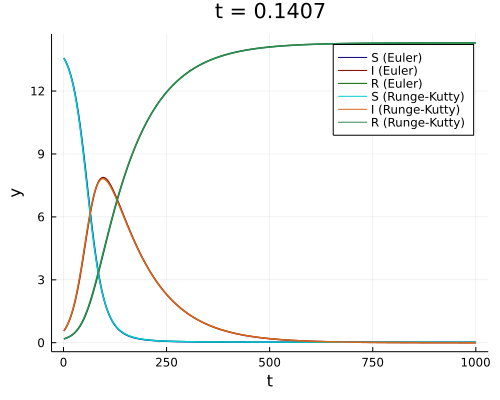

In [9]:
cmp_methods(S0, I0, R0, beta, gamma, t, n, cols)

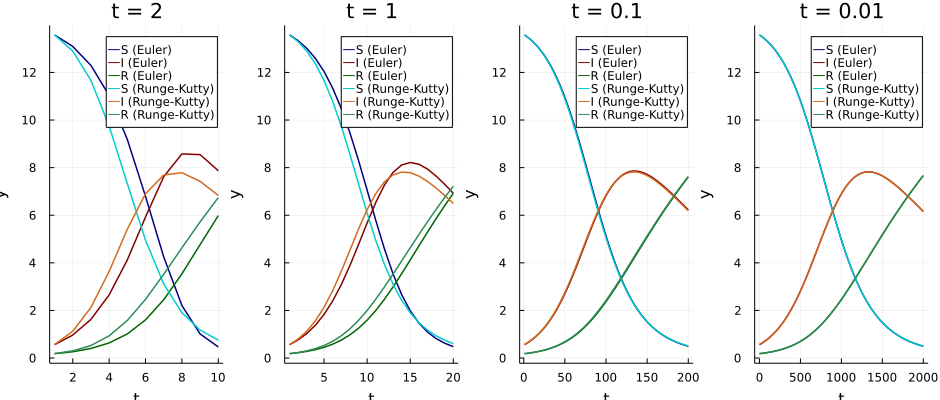

In [10]:
t = [2, 1, 0.1, 0.01, 0.001]
p1 = cmp_methods(S0, I0, R0, beta, gamma, 2, 10, cols)
p2 = cmp_methods(S0, I0, R0, beta, gamma, 1, 20, cols)
p3 = cmp_methods(S0, I0, R0, beta, gamma, 0.1, 200, cols)
p4 = cmp_methods(S0, I0, R0, beta, gamma, 0.01, 2000, cols)
plot(p1, p2, p3, p4, layouts=(1, 4), size = (940, 400))

In [11]:
@enum state s i r

In [12]:
mutable struct Point
    curr_state::state
    next_state::state
    neighbors::Vector{Vector{Int64}}
    checked::Bool
end    

In [13]:
mutable struct Statistics
    sus::Vector{Int64}
    inf::Vector{Int64}
    rec::Vector{Int64}
end 

In [14]:
function init_board(m, init_infected)
    board = Array{Point, 2}(undef, m, m)
    for i in 1:m
        for j in 1:m
            board[i, j] = Point(s, s, [], false)
        end
    end
    
    for coord in init_infected board[coord[1], coord[2]].curr_state = i end
    
    for x = 1:m 
        for y = 1:m 
            for a = -1:1
                for b = -1:1
                    if  x+a > 0 && x+a <= m && y+b > 0 && y+b <= m && (a != 0 || b != 0)
                        push!(board[x, y].neighbors, [x+a, y+b]) 
                    end
                end
            end
        end 
    end
    return board
end

init_board (generic function with 1 method)

In [15]:
function iteration(data, board, c, lambda, stats, k)
    sus = stats.sus[k]
    inf = stats.inf[k]
    rec = stats.rec[k]
    
    for x in 1:size(board, 1)
        for y in 1:size(board, 1)
            if board[x, y].curr_state == i
                p = rand(Uniform(0,1))
                if p < c
                    board[x, y].next_state = r
                    rec += 1
                    inf -= 1
                else
                    nei_len = length(board[x, y].neighbors)
                    rand_nei = board[x, y].neighbors[rand(1:nei_len)]
                    p = rand(Uniform(0,1))
                    a = rand_nei[1]
                    b = rand_nei[2]
                    if !board[a, b].checked && board[a, b].curr_state == s && p < lambda
                        board[a, b].next_state = i
                        inf += 1
                        sus -= 1
                    end
                    board[a, b].checked = true
                end
                board[x, y].checked = true
            end
        end
    end
    
    for i in 1:m for j in 1:m  end end
    
    for i in 1:m 
        for j in 1:m 
            data[i, j] = Int64(board[i, j].next_state)
            board[i, j].curr_state = board[i, j].next_state
            board[i, j].checked = false
        end 
    end
    
    push!(stats.sus, sus)
    push!(stats.inf, inf)
    push!(stats.rec, rec)
end

iteration (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\niczk\OneDrive\Documents\studies\4sem\mownit\labs\lab10\sir_fps30.gif
└ @ Plots C:\Users\niczk\.julia\packages\Plots\NQpB8\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\niczk\\OneDrive\\Documents\\studies\\4sem\\mownit\\labs\\lab10\\sir_fps30.gif")
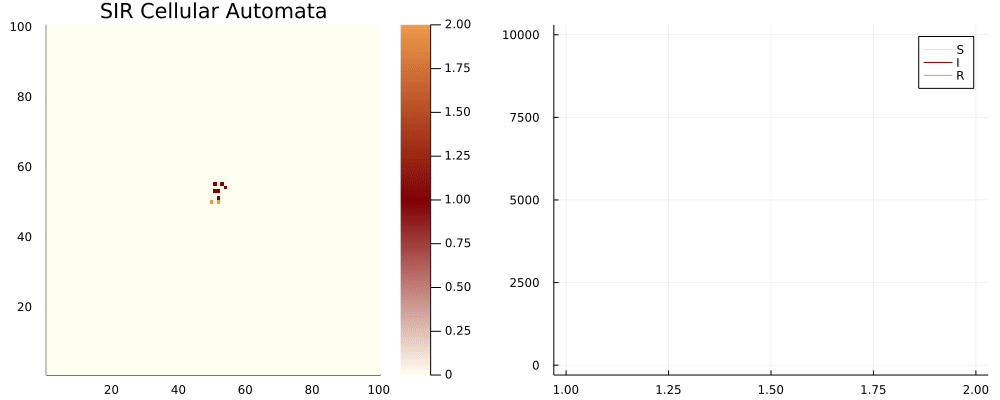

In [16]:
m = 100
# example first infections
init_infected = [[50, 50], [50, 51], [50, 52], [51, 51], [52, 53], [54, 51], [54, 53], [52, 52], [54, 52], [53, 53], [55, 55]]
stats = Statistics([m*m], [0], [0])
board = init_board(m, init_infected)
data = Array{Int64, 2}(undef, m, m)

for i in 1:m for j in 1:m data[i, j] = Int64(board[i, j].curr_state) end end
heatmap(1:size(data, 1), 1:size(data, 2), data, c = cgrad([:ivory, :maroon, :tan2]),
    title="SIR Cellular Automata")

anim = @animate for i = 1:200
    iteration(data, board, 0.1, 0.9, stats, i)
    
    map = heatmap(1:size(data, 1), 1:size(data, 2), data, c = cgrad([:ivory, :maroon, :tan2]),
    title="SIR Cellular Automata")

    splt = plot(1:i, stats.sus[1:i], label="S", color=:navajowhite1, width = 1.5)
    iplt = plot!(1:i, stats.inf[1:i], label="I", color=:maroon, width = 1.5)
    rplt = plot!(1:i, stats.rec[1:i], label="R", color=:tan2, width = 1.5)
    
    plot(map, rplt, layout=(1, 2), size=(1000, 400))
end
 
gif(anim, "sir_fps30.gif", fps = 30)